In [9]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from perceptron_learning_algorithm.algo.perceptron import Perceptron

In [2]:
flowers = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                      header=None)

In [3]:
flowers.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
# select setosa and versicolor
y = flowers.iloc[0:100, 4].values
y = np.where(y == 'Irish-setosa', -1, 1)

In [5]:
# extract sepal length and petal length
x = flowers.iloc[0:100, [0, 2]].values

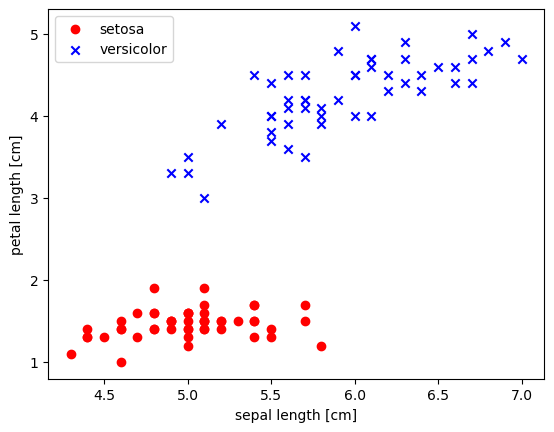

In [6]:
# plot area
plt.scatter(x[:50, 0],
            x[:50, 1],
            color='red',
            marker='o',
            label='setosa')
plt.scatter(x[50:100, 0], 
            x[50:100, 1],
            color='blue',
            marker='x',
            label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

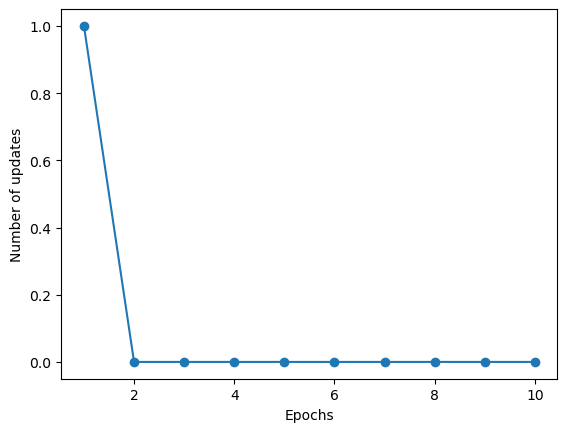

In [7]:
# plot misclassification error for each epoch
# This will check whether the algorithm converged and found a decision
# boundary that separates the two Irish flower classes:
perceptron = Perceptron(eta=0.1, n_iter=10)
perceptron.fit(x, y)
plt.plot(range(1, len(perceptron.errors_) + 1),
         perceptron.errors_,
         marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [8]:
perceptron.errors_

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [26]:
# plot decision boundary
def plot_decision_regions(X: np.ndarray,
                          y: np.ndarray,
                          classifier: Perceptron,
                          resolution=0.02) -> None:
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
               
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
               
    plt.contourf(xx1, xx2, z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
               
    # plot class samples
    for idx, clazz in enumerate(np.unique(y)):
        plt.scatter(x=X[y == clazz, 0],
                    y=X[y == clazz, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=clazz,
                    edgecolor='black')

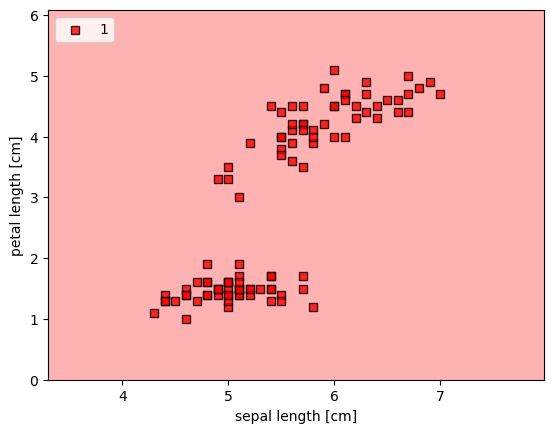

In [27]:
# Plot the contour map
plot_decision_regions(x, y, classifier=perceptron)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()